In [ ]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Linear Regression Review

#### Watch Demo Video Below

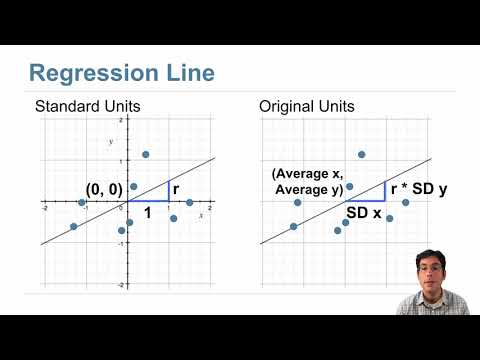

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('ulaZnIg2lEs', width=800, height=300)

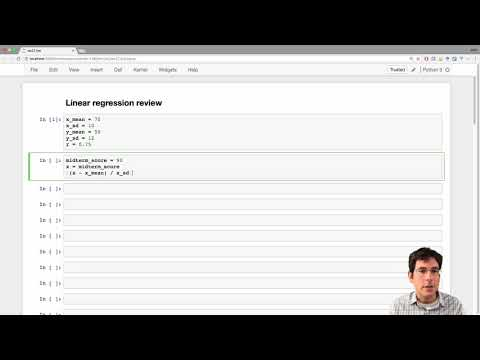

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo('fTA-mzrvacI', width=800, height=300)

**Please run all cells before this cell, including the import cell at the top of the notebook.**

In [ ]:
x_mean = 70
x_sd = 10
y_mean = 50
y_sd = 12
r = 0.75

In [ ]:
midterm_score = 90
x = midterm_score
(((x - x_mean) / x_sd) * r * y_sd) + y_mean

In [ ]:
midterm_score = 60
x = midterm_score
(((x - x_mean) / x_sd) * r * y_sd) + y_mean

In [ ]:
# y = a * x + b
a = r * (y_sd / x_sd)
b = y_mean - a * x_mean

In [ ]:
a * 90 + b

In [ ]:
a * 60 + b

## Linear Regression Example

#### Watch Demo Video Below

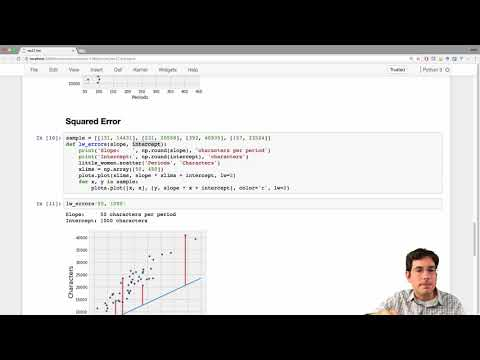

In [3]:
from IPython.display import YouTubeVideo

YouTubeVideo('BuTMV2r89Gc', width=800, height=300)

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

In [ ]:
little_women = Table.read_table('little_women.csv')
little_women = little_women.move_to_start('Periods')
little_women.show(3)

In [ ]:
def standard_units(any_numbers):
    """Convert any array of numbers to standard units."""
    return (any_numbers - np.average(any_numbers)) / np.std(any_numbers)

def correlation(t, x, y):
    """Return the correlation coefficient (r) of two variables."""
    return np.mean(standard_units(t.column(x)) * standard_units(t.column(y)))

def slope(t, x, y):
    """The slope of the regression line (original units)."""
    r = correlation(t, x, y)
    return r * np.std(t.column(y)) / np.std(t.column(x))

def intercept(t, x, y):
    """The intercept of the regression line (original units)."""
    return np.mean(t.column(y)) - slope(t, x, y) * np.mean(t.column(x))

In [ ]:
little_women.scatter(0, 1)

In [ ]:
correlation(little_women, 0, 1)

In [ ]:
a = slope(little_women, 0, 1)
b = intercept(little_women, 0, 1)
a * little_women.column(0) + b

In [ ]:
def linear_fit(t, x, y):
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a * t.column(x) + b

In [ ]:
lw_fitted = little_women.with_column(
    'fitted',
    linear_fit(little_women, 0, 1)
)
lw_fitted.scatter(0)

### Squared Error

In [ ]:
from IPython.display import YouTubeVideo

YouTubeVideo('ulaZnIg2lEs', width=800, height=300)

In [ ]:
sample = [[131, 14431], [231, 20558], [392, 40935], [157, 23524]]
def lw_errors(slope, intercept):
    print('Slope:    ', np.round(slope), 'characters per period')
    print('Intercept:', np.round(intercept), 'characters')
    little_women.scatter('Periods', 'Characters')
    xlims = np.array([50, 450])
    plots.plot(xlims, slope * xlims + intercept, lw=2)
    for x, y in sample:
        plots.plot([x, x], [y, slope * x + intercept], color='r', lw=2)

In [ ]:
lw_errors(50, 1000)

In [ ]:
lw_errors(-50, 20000)

In [ ]:
def lw_rmse(slope, intercept):
    lw_errors(slope, intercept)
    x = little_women.column('Periods')
    y = little_women.column('Characters')
    predicted = slope * x + intercept
    mse = np.mean((y - predicted) ** 2)
    print("Root mean squared error:", mse ** 0.5)

In [ ]:
lw_rmse(50, 10000)

In [ ]:
lw_rmse(-50, 20000)

In [ ]:
lw_rmse(90, 4000)

In [ ]:
lw_rmse(slope(little_women, 0, 1), intercept(little_women, 0, 1))

## Least Squares

#### Watch Demo Video Below

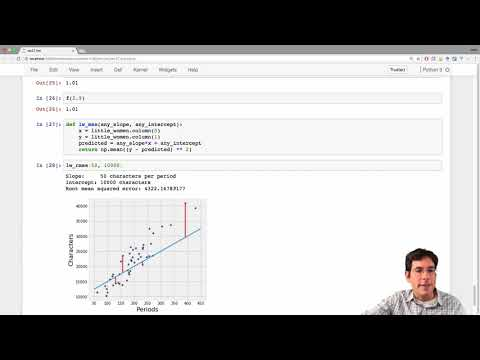

In [4]:
from IPython.display import YouTubeVideo

YouTubeVideo('uBaIf9B3BCQ', width=800, height=300)

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

In [ ]:
def f(x):
    return (x - 3) ** 2 + 1

In [ ]:
[f(1), f(2), f(3), f(4), f(5)]

In [ ]:
minimize(f)

In [ ]:
f(minimize(f))

In [ ]:
f(3)

In [ ]:
f(3.1)

In [ ]:
f(2.9)

In [ ]:
def lw_mse(any_slope, any_intercept):
    x = little_women.column(0)
    y = little_women.column(1)
    predicted = any_slope * x + any_intercept
    return np.mean((y - predicted) ** 2)

In [ ]:
lw_rmse(50, 10000)

In [ ]:
lw_mse(50, 10000) ** 0.5

In [ ]:
minimize(lw_mse)

In [ ]:
slope(little_women, 0, 1)

In [ ]:
intercept(little_women, 0, 1)